<a href="https://colab.research.google.com/github/cmgpcinthia/Big_Data_Machine_Learning/blob/main/12_Clase27N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aplicacion de Modelos

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

##Dataset Hotel Cancelations

In [ ]:
hotel = pd.read_csv("/content/drive/MyDrive/ESESA Lessons/hotel_bookings.csv" , sep=",", decimal=",")

In [ ]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,2015-07-03


In [ ]:
hotel.shape

(119390, 32)

In [ ]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel.hotel = hotel.hotel.map({'Resort Hotel':0, 'City Hotel':1})

In [ ]:
hotel.arrival_date_month = hotel.arrival_date_month.map({'January':1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12})

In [ ]:
hotel_dummies = pd.get_dummies(hotel, columns=['meal',
       'country', 'market_segment', 'distribution_channel', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type','required_car_parking_spaces', 'total_of_special_requests'])

In [ ]:
hotel_dummies.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces_1,required_car_parking_spaces_2,required_car_parking_spaces_3,required_car_parking_spaces_8,total_of_special_requests_0,total_of_special_requests_1,total_of_special_requests_2,total_of_special_requests_3,total_of_special_requests_4,total_of_special_requests_5
0,0,0,342,2015,7,27,1,0,0,2,...,False,False,False,False,True,False,False,False,False,False
1,0,0,737,2015,7,27,1,0,0,2,...,False,False,False,False,True,False,False,False,False,False
2,0,0,7,2015,7,27,1,0,1,1,...,False,False,False,False,True,False,False,False,False,False
3,0,0,13,2015,7,27,1,0,1,1,...,False,False,False,False,True,False,False,False,False,False
4,0,0,14,2015,7,27,1,0,2,2,...,False,False,False,False,False,True,False,False,False,False
5,0,0,14,2015,7,27,1,0,2,2,...,False,False,False,False,False,True,False,False,False,False
6,0,0,0,2015,7,27,1,0,2,2,...,False,False,False,False,True,False,False,False,False,False
7,0,0,9,2015,7,27,1,0,2,2,...,False,False,False,False,False,True,False,False,False,False
8,0,1,85,2015,7,27,1,0,3,2,...,False,False,False,False,False,True,False,False,False,False
9,0,1,75,2015,7,27,1,0,3,2,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
holtel_dummies = hotel_dummies.fillna(0, inplace=True)

In [ ]:
X = hotel_dummies.drop(["is_canceled","reservation_status_date","reservation_status"], axis=1)
y = hotel_dummies["is_canceled"]

In [ ]:
hotel_dummies.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces_1,required_car_parking_spaces_2,required_car_parking_spaces_3,required_car_parking_spaces_8,total_of_special_requests_0,total_of_special_requests_1,total_of_special_requests_2,total_of_special_requests_3,total_of_special_requests_4,total_of_special_requests_5
0,0,0,342,2015,7,27,1,0,0,2,...,False,False,False,False,True,False,False,False,False,False
1,0,0,737,2015,7,27,1,0,0,2,...,False,False,False,False,True,False,False,False,False,False
2,0,0,7,2015,7,27,1,0,1,1,...,False,False,False,False,True,False,False,False,False,False
3,0,0,13,2015,7,27,1,0,1,1,...,False,False,False,False,True,False,False,False,False,False
4,0,0,14,2015,7,27,1,0,2,2,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test, lr.predict(X_test)),3)

0.762

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr.predict(X_test))

array([[13497,  1520],
       [ 4168,  4693]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
round(accuracy_score(y_test, rf.predict(X_test)),3)

0.897

In [ ]:
confusion_matrix(y_test, rf.predict(X_test))

array([[14185,   832],
       [ 1637,  7224]])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=4,
    random_state=0
)

gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=150, random_state=0)

In [ ]:
confusion_matrix(y_test,gb.predict(X_test))

array([[13863,  1154],
       [ 2124,  6737]])

In [ ]:
round(accuracy_score(y_test, gb.predict(X_test)),3)

0.863

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
grid = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [3, 4, 5, 6],
}
rf_CV = GridSearchCV(estimator= RandomForestClassifier(),
                    param_grid=grid,
                    cv=5)
rf_CV.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400]})

##Dataset flights delayed

In [ ]:
flight = pd.read_csv("/content/drive/MyDrive/ESESA Lessons/flights.csv" , sep=",", decimal=",")

/tmp/ipython-input-4170604103.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flight = pd.read_csv("/content/drive/MyDrive/ESESA Lessons/flights.csv" , sep=",", decimal=",")


In [ ]:
flight.sample(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2891040,2015,7,1,3,WN,3310,N8600F,LAS,MDW,645,...,1201.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5163575,2015,11,19,4,EV,5485,N924EV,AEX,ATL,1112,...,1354.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4449863,2015,10,5,1,EV,4154,N15985,13930,10792,737,...,1011.0,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1840686,2015,4,28,2,DL,2667,N923AT,BOS,LGA,700,...,1128.0,189.0,0,0,NaN,0.0,0.0,189.0,0.0,0.0
1127125,2015,3,15,7,OO,5398,N915SW,SFO,SMF,745,...,845.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flight.shape

(5819079, 31)

In [ ]:
flight = flight[(flight['DIVERTED'] == 0) & (flight['CANCELLED'] == 0)]

In [ ]:
flight.shape

(5714008, 31)

In [ ]:
flight.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [ ]:
flightclean = flight.drop(["YEAR",'CANCELLED', 'CANCELLATION_REASON','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DIVERTED', 'CANCELLED','TAIL_NUMBER','ARRIVAL_TIME', 'ARRIVAL_DELAY'], axis=1)

In [ ]:
flightclean.sample(5)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL
2055902,5,11,1,DL,848,MSP,BOS,1311,1333.0,22.0,13.0,1346.0,170.0,170.0,145.0,1124,1711.0,12.0,1701
4235900,9,21,1,DL,952,ORD,SLC,1337,1336.0,-1.0,16.0,1352.0,213.0,195.0,173.0,1250,1545.0,6.0,1610
4476530,10,6,2,EV,4953,10397,11953,1755,1750.0,-5.0,29.0,1819.0,71.0,78.0,46.0,300,1905.0,3.0,1906
4963452,11,6,5,DL,87,DTW,MSP,1536,1542.0,6.0,17.0,1559.0,122.0,116.0,91.0,528,1630.0,8.0,1638
5657023,12,21,1,WN,397,BWI,RDU,1155,1205.0,10.0,9.0,1214.0,65.0,62.0,48.0,255,1302.0,5.0,1300


In [ ]:
flightclean.shape

(5714008, 19)

In [ ]:
flightclean = flightclean[flightclean['ORIGIN_AIRPORT'] == 'ATL']

In [ ]:
flightclean.drop('ORIGIN_AIRPORT', axis=1, inplace=True)

In [ ]:
flightclean.shape

(343506, 19)

(array([40898., 21675., 14348., 10088.,  6231.,  5776.,  4351.,  3453.,
         2855.,  2372.]),
 array([ 1. ,  6.8, 12.6, 18.4, 24.2, 30. , 35.8, 41.6, 47.4, 53.2, 59. ]),
 <BarContainer object of 10 artists>)

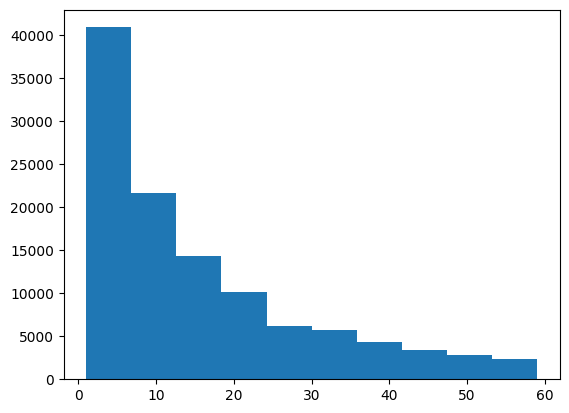

In [ ]:
import matplotlib.pyplot as plt
flightclean_delay = flightclean[(flightclean["DEPARTURE_DELAY"] <60) & (flightclean["DEPARTURE_DELAY"] >0)]
plt.hist(flightclean_delay["DEPARTURE_DELAY"], bins=10)

In [ ]:
flightclean["FINAL_DELAYED"] = flightclean["DEPARTURE_DELAY"]>20

In [ ]:
flightclean.FINAL_DELAYED.value_counts()

,count
FINAL_DELAYED,
False,294856
True,48650


In [ ]:
flightclean.shape

(343506, 19)

In [ ]:
flightclean.sample(5)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,FINAL_DELAYED
1734638,4,21,2,DL,852,MSP,1350,1356.0,6.0,22.0,1418.0,164.0,161.0,134.0,907,1532.0,5.0,1534,False
583894,2,8,7,EV,5420,MLU,1612,1606.0,-6.0,14.0,1620.0,99.0,85.0,68.0,448,1628.0,3.0,1651,False
5424082,12,6,7,DL,2615,PIT,1415,1413.0,-2.0,20.0,1433.0,100.0,93.0,66.0,526,1539.0,7.0,1555,False
3229972,7,21,2,DL,1765,RSW,1225,1245.0,20.0,15.0,1300.0,103.0,93.0,75.0,515,1415.0,3.0,1408,False
5658346,12,21,1,WN,1716,HOU,1320,1351.0,31.0,14.0,1405.0,135.0,134.0,113.0,696,1458.0,7.0,1435,True


In [ ]:
flight_dummies = pd.get_dummies(flightclean, columns=["AIRLINE", "DESTINATION_AIRPORT"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = flight_dummies.drop(["FINAL_DELAYED"], axis=1)
y = flight_dummies["FINAL_DELAYED"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()